In [7]:
#Importar liberias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\acer\AppData\Local\Temp\ipykernel_9100\2718804192.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
#Visualizar dataset
df = pd.read_csv('Dataset_multivariable.csv',sep=',')
print(df)

    x1   x2    x3    x4    x5     y
0  1.0  0.4 -12.0  12.0  10.2  11.6
1  1.0  0.6 -15.0  16.0  11.9  14.5
2  1.0  0.8 -18.0  20.0  13.6  17.4
3  1.0  1.0 -21.0  24.0  15.3  20.3
4  1.0  1.2 -24.0  28.0  17.0  23.2
5  1.0  1.4 -27.0  32.0  18.7  26.1
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
8  1.0  2.0 -36.0  44.0  23.8  34.8
9  1.0  2.2 -39.0  48.0  25.5  37.7


In [9]:
#División de los datos en entrenamiento y prueba 70% y 30% respectivamente
train_data, test_data = train_test_split(df, test_size=0.3, shuffle=True, random_state=0)
print('Train_data:\n',train_data)
print('Test_data:\n',test_data)

Train_data:
     x1   x2    x3    x4    x5     y
9  1.0  2.2 -39.0  48.0  25.5  37.7
1  1.0  0.6 -15.0  16.0  11.9  14.5
6  1.0  1.6 -30.0  36.0  20.4  29.0
7  1.0  1.8 -33.0  40.0  22.1  31.9
3  1.0  1.0 -21.0  24.0  15.3  20.3
0  1.0  0.4 -12.0  12.0  10.2  11.6
5  1.0  1.4 -27.0  32.0  18.7  26.1
Test_data:
     x1   x2    x3    x4    x5     y
2  1.0  0.8 -18.0  20.0  13.6  17.4
8  1.0  2.0 -36.0  44.0  23.8  34.8
4  1.0  1.2 -24.0  28.0  17.0  23.2


In [83]:
def bgd_multi(x_data, y_data, w, a, iter, x_test, y_test):
    weig = w
    n = len(w)
    m = len(y_data)
    suma = 0
    error = []
    errores = 0
    for j in range(iter):
        errores = 0
        suma = 0
        for k in range(m):
            suma += (weig*x_data[k] - y_data[k]) * x_data[k]
        weig= weig - a * 2 * suma
        print(f"Iteración {j}: w = {weig[:n]}")
        for i in range(len(x_test)):
            predic = y_pred(x_test[i], weig)
            errores += error_estimacion(predic, y_test[i])
            print(f"y_pred {i}: {predic}")
        print(f"Error de estimación {j}: {errores}")
        error.append(errores)
    return weig, error

def y_pred(x_test, w):
    y = np.dot(w, x_test)
    return y

def error_estimacion(y_pred, y_test):
    return abs(y_pred - y_test)

y_test
[17.4 34.8 23.2]
Iteración 0: w = [ 0.0020532   0.00308328 -0.0585684   0.0698784   0.04016964]
y_pred 0: 3.002626128
y_pred 1: 6.147369192
y_pred 2: 4.050873816
Error de estimación 0: 62.199130864
Iteración 1: w = [ 0.00410623  0.00616604 -0.11358826  0.13371931  0.07918999]
y_pred 0: 5.8049976378882855
y_pred 1: 11.873986734371123
y_pred 2: 7.827994003382565
Error de estimación 1: 49.89302162435803
Iteración 2: w = [ 0.00615908  0.00924827 -0.16527457  0.19204436  0.11709392]
y_pred 0: 8.421864503496344
y_pred 1: 17.21132733235039
y_pred 2: 11.351685446447693
Error de estimación 2: 38.41512271770557
Iteración 3: w = [ 0.00821177  0.01232999 -0.21382932  0.24533013  0.15391339]
y_pred 0: 10.86682803624258
y_pred 1: 22.188391286469077
y_pred 2: 14.640682452984745
Error de estimación 3: 27.704098224303593


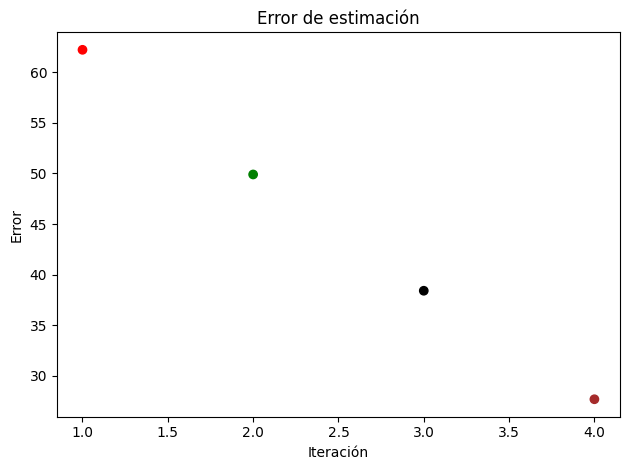

In [85]:
# Obtener características (X) y etiquetas (y)
x_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

iteraciones = 4
w = [0,0,0,0,0]
a = 0.000006
e=[]
print("y_test")
print(y_test)

we, e = bgd_multi(x_train, y_train, w, a, iteraciones, x_test, y_test)

colores = ['red', 'green', 'black', 'brown', 'magenta']
plt.scatter(range(1, len(e) + 1), e, color=colores[:len(e)])
plt.title('Error de estimación')
plt.xlabel('Iteración')
plt.ylabel('Error')

plt.tight_layout()
plt.show()